In [1]:
import os
from src.config import config
os.environ["nnUNet_raw"] = os.path.join(config["DATA_DIR"], "nnunet_raw")
os.environ["nnUNet_preprocessed"] = os.path.join(config["DATA_DIR"], "nnUNet_preprocessed") 
os.environ["nnUNet_results"] = os.path.join(config["DATA_DIR"], "nnUNet_results")
os.environ["NNINT_CKPT_DIR"] = config["NNINT_CKPT_DIR"]

Loaded configuration for machine: nora


In [2]:
import nnunetv2
nnunetv2.__file__


'/nfs/norasys/notebooks/camaret/nnUNet/nnunetv2/__init__.py'

In [3]:
import json
dataset_folder = os.environ["nnUNet_preprocessed"]+ "/Dataset007_AMOS/"
plan_json = json.load(open(os.path.join(dataset_folder, "nnUNetResEncUNetLPlans.json"), "r"))
dataset_json = json.load(open(os.path.join(dataset_folder, "dataset.json"), "r"))

In [4]:
import torch
import torch._dynamo
torch._dynamo.config.suppress_errors = True

from nnunetv2.training.nnUNetTrainer.CustomTrainer import CustomTrainer
fold = 0
#os.environ["TORCH_COMPILE_DISABLE"] = "1"  # Disable torch.compile for debugging

trainer = CustomTrainer(
    plans=plan_json,
    configuration="3d_fullres_ps192",
    fold=fold,
    dataset_json=dataset_json,
    device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
)
# Set the initial checkpoint path using the new setter method
trainer.set_initial_checkpoint(os.path.join(os.environ["NNINT_CKPT_DIR"] ,"nnInteractive_v1.0/fold_0/checkpoint_final.pth"))
trainer.initialize()

Using device: cuda:0

#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

2025-05-26 23:19:04.257988: Initial checkpoint path set to: /nfs/norasys/notebooks/camaret/model_checkpoints/nnint/nnInteractive_v1.0/fold_0/checkpoint_final.pth
2025-05-26 23:19:07.190022: Using torch.compile...


In [5]:
dataloader_train, dataloader_val = trainer.get_dataloaders()

2025-05-26 23:19:09.331529: do_dummy_2d_data_aug: False
2025-05-26 23:19:09.376586: Using splits from existing split file: /nfs/data/nii/data1/Analysis/GPUnet/ANALYSIS_incontext/SegFM3D/data/nnUNet_preprocessed/Dataset007_AMOS/splits_final.json
2025-05-26 23:19:09.397893: The split file contains 5 splits.
2025-05-26 23:19:09.413324: Desired fold for training: 0
2025-05-26 23:19:09.429842: This split has 19 training and 5 validation cases.
using pin_memory on device 0
using pin_memory on device 0


In [6]:
batch_train = next(iter(dataloader_train))

Batch keys: dict_keys(['data', 'target', 'keys'])
data shape: torch.Size([2, 8, 192, 192, 192])
target is a list with length: 5
target shapes: [torch.Size([2, 1, 192, 192, 192]), torch.Size([2, 1, 96, 96, 96]), torch.Size([2, 1, 48, 48, 48]), torch.Size([2, 1, 24, 24, 24]), torch.Size([2, 1, 12, 12, 12])]
img shape: (8, 192, 192, 192)
unique values in channel 0: (array([-1.2191881, -1.1391149, -1.132273 , ...,  4.016771 ,  4.021283 ,
        4.0334644], dtype=float32), array([1, 1, 1, ..., 1, 1, 1]))
unique values in channel 1: (array([0.], dtype=float32), array([7077888]))
unique values in channel 2: (array([0., 1.], dtype=float32), array([5324928, 1752960]))
unique values in channel 3: (array([0.], dtype=float32), array([7077888]))
unique values in channel 4: (array([0.], dtype=float32), array([7077888]))
unique values in channel 5: (array([0.], dtype=float32), array([7077888]))
unique values in channel 6: (array([0.], dtype=float32), array([7077888]))
unique values in channel 7: (ar

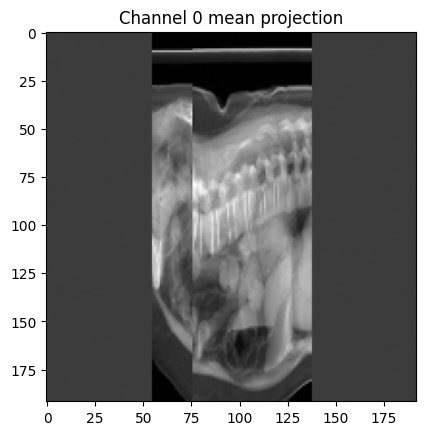

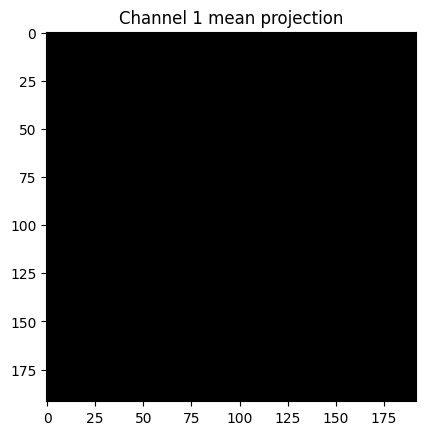

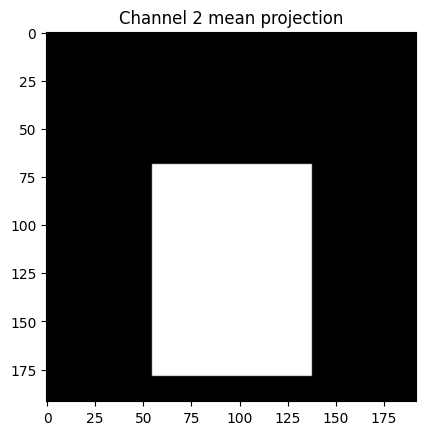

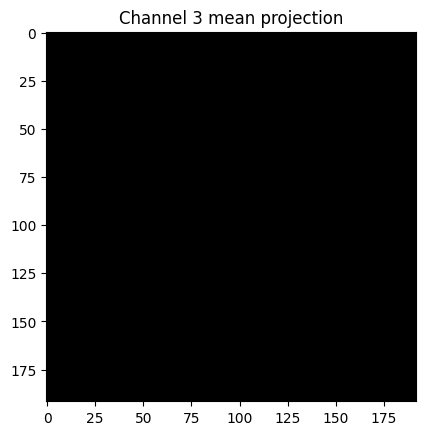

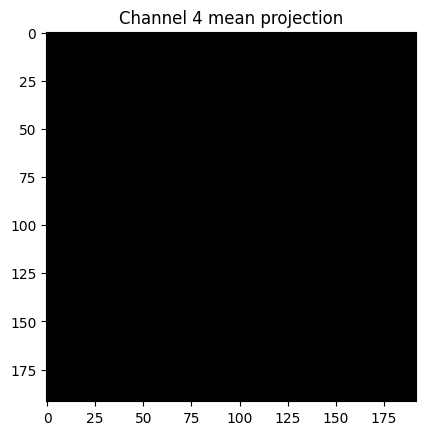

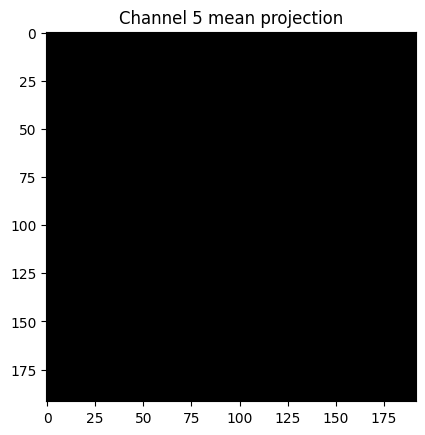

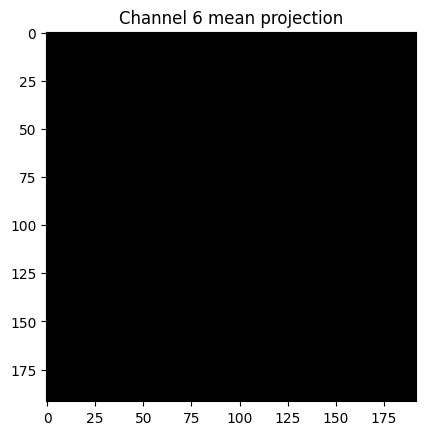

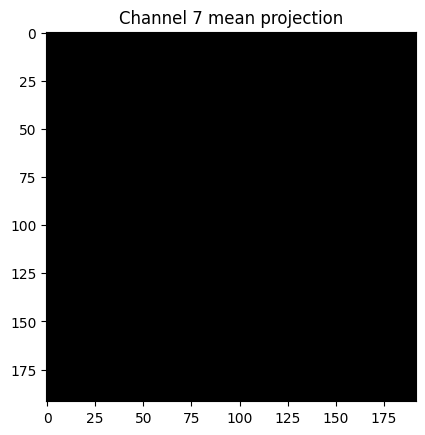

<Figure size 640x480 with 0 Axes>

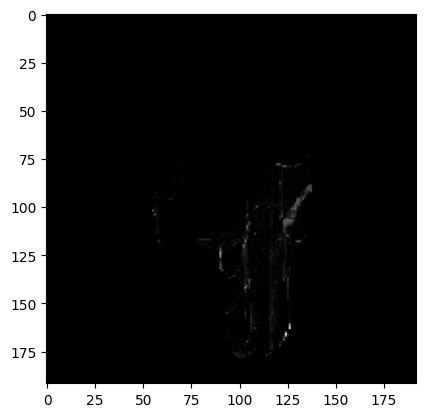

In [7]:
%matplotlib inline
import numpy as np
print("Batch keys:", batch_train.keys())
print("data shape:", batch_train["data"].shape)

if isinstance(batch_train["target"], list):
    print("target is a list with length:", len(batch_train["target"]))
    print("target shapes:", [t.shape for t in batch_train["target"]])
else:
    print("target is not a list, it has shape:", batch_train["target"].shape)


batch_idx = 0

import matplotlib.pyplot as plt 
batch_data = batch_train["data"][batch_idx].cpu().numpy()
print("img shape:", batch_data.shape)

for i in range(batch_data.shape[0]):
    plt.figure()
    plt.imshow(batch_data[i].mean(axis=0), cmap="grey")
    plt.title(f"Channel {i} mean projection")
    print(f"unique values in channel {i}:", np.unique(batch_data[i], return_counts=True))
plt.figure()

plt.figure()
batch_target = batch_train["target"][0][batch_idx].cpu().numpy()
batch_target = batch_target.squeeze()  # Remove singleton dimensions
print("target shape:", batch_target.shape)
print("target unique values:", np.unique(batch_target, return_counts=True))
plt.imshow(batch_target.mean(axis=0), cmap="grey")

In [8]:
preproced_dir =  os.environ["nnUNet_preprocessed"] + '/Dataset007_AMOS/nnUNetPlans_3d_fullres'
os.listdir(preproced_dir)
case_name = "CT_AMOS_amos_0117"
files = [f for f in os.listdir(preproced_dir) if f.startswith(case_name)]
print("Files for case:", files)

Files for case: ['CT_AMOS_amos_0117.pkl', 'CT_AMOS_amos_0117_seg.b2nd', 'CT_AMOS_amos_0117.b2nd']


Array shape: (1, 742, 427, 65)


Array min and max: -1 13
unique values: (array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
      dtype=int16), array([13394186,  6178232,   109512,    57758,    61233,    15571,
          17573,   545122,    24794,   100376,    29742,    31527,
            905,     1273,    26406]))


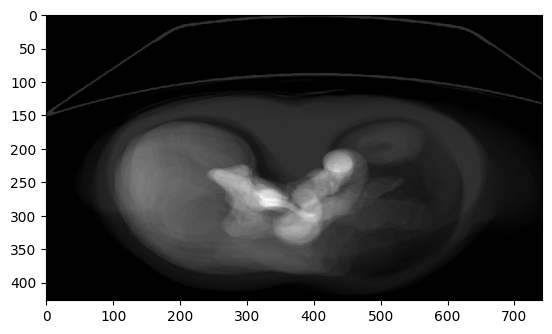

In [9]:
import blosc2
import numpy as np
b2nd_filepath = os.path.join(preproced_dir, files[1])
arr_blosc = blosc2.open(urlpath=b2nd_filepath, mode='r')
print("Array shape:", arr_blosc.shape)
print("Array min and max:", arr_blosc.min(), arr_blosc.max())
print("unique values:", np.unique(arr_blosc, return_counts=True))
plt.figure()
plt.imshow(arr_blosc[0].mean(axis=2).T, cmap="grey")

In [10]:
# open pickle file
import pickle
pickle_filepath = os.path.join(preproced_dir, files[0])
with open(pickle_filepath, 'rb') as f:
    dict_pickle = pickle.load(f)
print("keys in pickle:", dict_pickle.keys())

keys in pickle: dict_keys(['nibabel_stuff', 'spacing', 'shape_before_cropping', 'bbox_used_for_cropping', 'shape_after_cropping_and_before_resampling', 'class_locations'])


In [11]:
for k, v in dict_pickle.items():
    print(f"{k}: {v.shape if hasattr(v, 'shape') else v}")

nibabel_stuff: {'original_affine': array([[0.5078125, 0.       , 0.       , 0.       ],
       [0.       , 0.5078125, 0.       , 0.       ],
       [0.       , 0.       , 5.       , 0.       ],
       [0.       , 0.       , 0.       , 1.       ]]), 'reoriented_affine': array([[0.5078125, 0.       , 0.       , 0.       ],
       [0.       , 0.5078125, 0.       , 0.       ],
       [0.       , 0.       , 5.       , 0.       ],
       [0.       , 0.       , 0.       , 1.       ]])}
spacing: [5.0, 0.5078125, 0.5078125]
shape_before_cropping: (768, 768, 88)
bbox_used_for_cropping: [[26, 768], [14, 594], [0, 88]]
shape_after_cropping_and_before_resampling: (742, 580, 88)
class_locations: {}


In [12]:
print(dict_pickle["class_locations"].keys())
for k, v in dict_pickle["class_locations"].items():
    print(f"{k}: { v}")


dict_keys([])


In [13]:
trainer.run_training()

2025-05-26 23:19:27.104825: do_dummy_2d_data_aug: False
2025-05-26 23:19:27.125032: Using splits from existing split file: /nfs/data/nii/data1/Analysis/GPUnet/ANALYSIS_incontext/SegFM3D/data/nnUNet_preprocessed/Dataset007_AMOS/splits_final.json
2025-05-26 23:19:27.143592: The split file contains 5 splits.
2025-05-26 23:19:27.161986: Desired fold for training: 0
2025-05-26 23:19:27.179673: This split has 19 training and 5 validation cases.


using pin_memory on device 0
using pin_memory on device 0

This is the configuration used by this training:
Configuration name: 3d_fullres_ps192
 {'data_identifier': 'nnUNetResEncUNetLPlans_noResampling_3d_fullres', 'preprocessor_name': 'DefaultPreprocessor', 'batch_size': 2, 'patch_size': [192, 192, 192], 'median_image_size_in_voxels': [168.0, 239.0, 282.0], 'spacing': [1.5, 1.5, 1.5], 'normalization_schemes': ['ZScoreNormalization'], 'use_mask_for_norm': [False], 'resampling_fn_data': 'resample_data_or_seg_to_shape', 'resampling_fn_seg': 'resample_data_or_seg_to_shape', 'resampling_fn_data_kwargs': {}, 'resampling_fn_seg_kwargs': {}, 'resampling_fn_probabilities': 'resample_data_or_seg_to_shape', 'resampling_fn_probabilities_kwargs': {}, 'architecture': {'network_class_name': 'dynamic_network_architectures.architectures.unet.ResidualEncoderUNet', 'arch_kwargs': {'n_stages': 6, 'features_per_stage': [32, 64, 128, 256, 320, 320], 'conv_op': 'torch.nn.modules.conv.Conv3d', 'kernel_sizes

W0526 23:20:08.012000 53358 site-packages/torch/_dynamo/convert_frame.py:1233] WON'T CONVERT forward /software/anaconda3/envs/segfm3d_2/lib/python3.12/site-packages/dynamic_network_architectures/architectures/unet.py line 116 
W0526 23:20:08.012000 53358 site-packages/torch/_dynamo/convert_frame.py:1233] due to: 
W0526 23:20:08.012000 53358 site-packages/torch/_dynamo/convert_frame.py:1233] Traceback (most recent call last):
W0526 23:20:08.012000 53358 site-packages/torch/_dynamo/convert_frame.py:1233]   File "/software/anaconda3/envs/segfm3d_2/lib/python3.12/site-packages/torch/_dynamo/convert_frame.py", line 1164, in __call__
W0526 23:20:08.012000 53358 site-packages/torch/_dynamo/convert_frame.py:1233]     result = self._inner_convert(
W0526 23:20:08.012000 53358 site-packages/torch/_dynamo/convert_frame.py:1233]              ^^^^^^^^^^^^^^^^^^^^
W0526 23:20:08.012000 53358 site-packages/torch/_dynamo/convert_frame.py:1233]   File "/software/anaconda3/envs/segfm3d_2/lib/python3.12/s

KeyboardInterrupt: 